<a href="https://colab.research.google.com/github/elsoares-physica/GBW-Model/blob/main/GBW_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GBW Model

Author: Ezequiel Lopes Soares

FEDERAL UNIVERSITY OF RIO GRANDE - FURG, BRAZIL

---


The objective of this work is to reproduce the 
updated GBW model (2018), comparing it with data from the HERA collider. For this, let's calculate the proton structure functions, $F_2(x, Q^2)$, given by

\begin{align*}
  F_2 = F_T + F_L = \frac{Q^2}{4 \pi^2 \alpha_{em}}\left(\sigma_{T}^{\gamma^*p}(x,Q^2) + \sigma_{L}^{\gamma^*p}(x,Q^2)\right),
\end{align*}

where $\sigma^{\gamma^*p}_{T,L}(x,Q^2)$ is the total cross section, which is given by

\begin{align*}
    \sigma^{\gamma^{*}p}_{T,L} = \sum_{f} \int d^2r \int_{0}^{1}dz |\Psi_{T,L}(r,z,Q^2,m_f)|^2 \sigma_{dip}(r,x).
\end{align*}

The transverse and longitudinal functions, $\Psi_{T,L}$, used in the calculation were respectively

\begin{align*}
    |\Psi_T(r, z; Q^2|^2 = \frac{2 N_c \alpha_{em}}{4 \pi^2} \sum_f e^{2}_{f} \left\{ [z^2 + (1 - z)^2] \bar{Q}^2_f K^2_1(\bar{Q}_f r) + m^2_f K^2_0(\bar{Q}_f r) \right\},
\end{align*}

\begin{align*}
    |\Psi_L(r, z; Q^2|^2 = \frac{2 N_c \alpha_{em}}{4 \pi^2} \sum_f e^{2}_{f} \left\{ 4 Q^2 z^2 (1 - z)^2 K^2_0(\bar{Q}_f r) \right\},
\end{align*}

onde, $\bar{Q}^2_f = z (1 - z) Q^2 + m^2_f$, $m_f$ is the quark mass for each flavor $f$ and $K_{01}$ are the Bessel's functions for 0 and first order. 

The cross section of the dipole-proton interaction, $\sigma_{dip}(r,x)$, is given by

\begin{align*}
    \sigma_{dip}(r,x) = \sigma_0 \left[1 - \exp{ \left(\frac{-r^2 Q_{s}^{2}(x)}{4} \right)} \right],
\end{align*}

where, $\sigma_0$ is a constant and $Q_s$ is an increasing function with increasing energy, called \textit{saturation scale}, which is given by
\begin{align*}
     Q_{s}^{2}(x) = Q_{0}^{2}(x/x_0)^{-\lambda},
\end{align*}

where $Q_{0}^{2} = 1 GeV^{2}$, $x_0$ and $\lambda$ are constants, where $\lambda$ is between $0{,}2$ and $0{,}3 $.


---
# First, we import the required libraries:

In [1]:
import numpy as np
import pandas as pd
from math import pi, exp, sqrt
from scipy.integrate import nquad
from scipy.special import kn
import matplotlib.pyplot as plt

# We declare the constants and parameters of the GBW model:

In [2]:
Nc = 3 # number of quark colors
alpha = 1/137 # coupling constant

# All charges > 0, as in the code they are only used squared.

e_ucb = 2/3 # charges: quarks up, charm, bottom
e_ds = 1/3 # charges: quarks down, strange

m_l = 0.14 # quarks up, down, strange masses
m_c = 1.4 # quark charm mass
m_b = 4.6 # quark bottom mass

# List with photon's virtualities:

#lista_Q2 = [0.065, 0.085, 0.11, 0.15, 0.2, 0.25, 0.35, 0.4, 0.5, 0.65, 0.85, 1.2, 1.5, 2, 2.7, 3.5, 4.5, 6.5, 8.5, 10, 12]
lista_Q2 = [0.085, 0.85, 8.5] # Use this list for testing

# GBW Parameters

sig0 = (27.42 / 0.389) # Converted to GeV^-2
Q0 = 1 # Gev^2
lambda1 = 0.248
x0 = 0.4 * (10 ** -4)

lista_F2 = [] # This list will store the values of the F2 function that will be calculated next
lista_x_graf = [] # This list will store the Bjorken x values 

# Creating Bjorken's x-list to plot on a graph:

In [3]:
for x in np.arange(0.000001, 0.01, 0.0001):

    lista_x_graf.append(x)

# Below, these data were taken from a HERA collider database. 
The columns are: 1) Vituality; 2) x from Bjorken; 3) Total Shock Section; 4) Error:

In [4]:
tab = pd.DataFrame([[0.085, 1.17 * 10 ** -6, 178.1, 17.1], # Use this dataframe for testing
                    [0.085, 1.34 * 10 ** -6, 170.6, 11.6],
                    [0.085, 1.56 * 10 ** -6, 165.6, 11.8],
                    [0.850, 1.24 * 10 ** -5, 77.70, 3.70],
                    [0.850, 1.38 * 10 ** -5, 86.60, 11.3],
                    [0.850, 2.00 * 10 ** -5, 82.20, 3.00],
                    [0.850, 2.00 * 10 ** -5, 82.30, 4.90],
                    [0.850, 3.98 * 10 ** -5, 74.00, 2.60],
                    [0.850, 5.00 * 10 ** -5, 71.60, 4.20],
                    [0.850, 1.00 * 10 ** -4, 66.40, 4.10],
                    [0.850, 2.51 * 10 ** -4, 52.40, 3.80],
                    [0.850, 8.00 * 10 ** -4, 46.20, 2.60],
                    [0.850, 3.20 * 10 ** -3, 40.70, 2.20],
                    [8.500, 9.86 * 10 ** -5, 18.50, 0.70],
                    [8.500, 1.05 * 10 ** -4, 18.40, 1.10],
                    [8.500, 1.12 * 10 ** -4, 17.90, 0.70],
                    [8.500, 1.24 * 10 ** -4, 18.50, 0.60],
                    [8.500, 1.29 * 10 ** -4, 17.90, 0.50],
                    [8.500, 1.39 * 10 ** -4, 17.30, 0.90],
                    [8.500, 1.39 * 10 ** -4, 18.00, 1.10],
                    [8.500, 2.00 * 10 ** -4, 16.30, 0.30],
                    [8.500, 2.00 * 10 ** -4, 16.70, 0.30],
                    [8.500, 3.20 * 10 ** -4, 14.80, 0.20],
                    [8.500, 5.00 * 10 ** -4, 13.40, 0.20],
                    [8.500, 8.00 * 10 ** -4, 12.30, 0.20],
                    [8.500, 1.30 * 10 ** -3, 11.10, 0.20],
                    [8.500, 2.00 * 10 ** -3, 10.20, 0.20],
                    [8.500, 3.20 * 10 ** -3, 8.800, 0.20],
                    [8.500, 5.00 * 10 ** -3, 8.400, 0.20],
                    [8.500, 2.00 * 10 ** -2, 6.100, 0.20]],
                    columns=['$Q^2$', '$x_{bj}$', '$\sigma$', 'Erro'])

'''      
tab = pd.DataFrame([[0.065, 8.97 * 10 ** -7, 189.9, 20.6],
                    [0.065, 1.02 * 10 ** -6, 191.2, 18.7],
                    [0.085, 1.17 * 10 ** -6, 178.1, 17.1],
                    [0.085, 1.34 * 10 ** -6, 170.6, 11.6],
                    [0.085, 1.56 * 10 ** -6, 165.6, 11.8],
                    [0.110, 1.51 * 10 ** -6, 167.2, 16.4],
                    [0.110, 1.73 * 10 ** -6, 168.1, 9.50],
                    [0.110, 2.02 * 10 ** -6, 159.4, 6.40],
                    [0.110, 2.43 * 10 ** -6, 152.1, 8.50],
                    [0.150, 2.07 * 10 ** -6, 168.9, 14.2],
                    [0.150, 2.36 * 10 ** -6, 148.2, 7.20],
                    [0.150, 2.76 * 10 ** -6, 149.4, 5.40],
                    [0.150, 3.31 * 10 ** -6, 149.6, 4.90],
                    [0.150, 4.14 * 10 ** -6, 139.5, 4.70],
                    [0.150, 5.02 * 10 ** -6, 138.6, 7.80],
                    [0.200, 3.15 * 10 ** -6, 139.4, 7.20],
                    [0.200, 3.68 * 10 ** -6, 137.8, 5.20],
                    [0.200, 4.41 * 10 ** -6, 134.0, 4.20],
                    [0.200, 5.52 * 10 ** -6, 131.6, 3.80],
                    [0.200, 6.69 * 10 ** -6, 127.5, 7.20],
                    [0.200, 8.49 * 10 ** -6, 125.6, 3.80],
                    [0.200, 1.10 * 10 ** -5, 116.7, 5.10],
                    [0.200, 3.98 * 10 ** -5, 118.7, 24.5],
                    [0.200, 2.51 * 10 ** -4, 100.8, 15.5],
                    [0.250, 3.94 * 10 ** -6, 124.6, 7.30],
                    [0.250, 4.60 * 10 ** -6, 125.3, 5.10],
                    [0.250, 5.52 * 10 ** -6, 126.3, 4.10],
                    [0.250, 6.90 * 10 ** -6, 123.3, 3.60],
                    [0.250, 8.36 * 10 ** -6, 119.4, 3.50],
                    [0.250, 1.06 * 10 ** -5, 116.7, 3.10],
                    [0.250, 1.38 * 10 ** -5, 111.7, 3.10],
                    [0.250, 2.30 * 10 ** -5, 109.1, 4.30],
                    [0.250, 3.98 * 10 ** -5, 105.9, 5.00],
                    [0.250, 1.10 * 10 ** -4, 89.40, 4.50],
                    [0.250, 2.51 * 10 ** -4, 87.90, 4.60],
                    [0.250, 3.94 * 10 ** -4, 87.20, 5.20],
                    [0.250, 1.58 * 10 ** -3, 88.80, 11.2],
                    [0.350, 5.12 * 10 ** -6, 111.3, 6.40],
                    [0.350, 5.12 * 10 ** -6, 144.7, 37.2],
                    [0.350, 6.10 * 10 ** -6, 118.2, 16.7],
                    [0.350, 6.62 * 10 ** -6, 107.6, 3.70],
                    [0.350, 8.28 * 10 ** -6, 107.0, 3.40],
                    [0.350, 1.00 * 10 ** -5, 111.4, 3.20],
                    [0.350, 1.27 * 10 ** -5, 104.2, 2.90],
                    [0.350, 1.65 * 10 ** -5, 100.6, 2.80],
                    [0.350, 3.20 * 10 ** -5, 94.90, 3.90],
                    [0.350, 6.62 * 10 ** -5, 90.50, 3.40],
                    [0.350, 1.30 * 10 ** -4, 82.50, 2.90],
                    [0.350, 2.20 * 10 ** -4, 76.90, 3.00],
                    [0.350, 5.00 * 10 ** -4, 76.90, 2.90],
                    [0.350, 2.51 * 10 ** -3, 64.70, 7.20],
                    [0.400, 8.83 * 10 ** -6, 98.90, 5.10],
                    [0.400, 1.10 * 10 ** -5, 104.0, 3.80],
                    [0.400, 1.33 * 10 ** -5, 100.1, 3.40],
                    [0.400, 1.70 * 10 ** -5, 99.50, 2.90],
                    [0.400, 2.20 * 10 ** -5, 94.00, 2.70],
                    [0.400, 3.68 * 10 ** -5, 92.50, 3.90],
                    [0.400, 8.83 * 10 ** -5, 89.80, 3.30],
                    [0.400, 1.76 * 10 ** -4, 80.60, 3.00],
                    [0.400, 2.94 * 10 ** -4, 77.60, 3.00],
                    [0.400, 6.31 * 10 ** -4, 73.00, 3.00],
                    [0.500, 7.32 * 10 ** -6, 100.6, 10.1],
                    [0.500, 8.60 * 10 ** -6, 103.1, 11.6],
                    [0.500, 1.58 * 10 ** -5, 96.20, 4.60],
                    [0.500, 2.12 * 10 ** -5, 87.80, 2.90],
                    [0.500, 2.76 * 10 ** -5, 84.80, 2.70],
                    [0.500, 3.98 * 10 ** -5, 81.80, 3.60],
                    [0.500, 1.00 * 10 ** -4, 78.20, 2.30],
                    [0.500, 2.51 * 10 ** -4, 69.10, 2.00],
                    [0.500, 3.68 * 10 ** -4, 67.40, 2.20],
                    [0.500, 8.00 * 10 ** -4, 64.40, 2.00],
                    [0.500, 3.20 * 10 ** -3, 41.00, 5.40],
                    [0.650, 9.52 * 10 ** -6, 84.60, 5.30],
                    [0.650, 1.12 * 10 ** -5, 92.40, 5.90],
                    [0.650, 1.58 * 10 ** -5, 81.10, 5.30],
                    [0.650, 1.64 * 10 ** -5, 89.20, 7.50],
                    [0.650, 3.98 * 10 ** -5, 81.70, 3.20],
                    [0.650, 5.98 * 10 ** -5, 71.90, 3.70],
                    [0.650, 1.00 * 10 ** -4, 70.60, 2.70],
                    [0.650, 2.51 * 10 ** -4, 62.30, 2.10],
                    [0.650, 4.78 * 10 ** -4, 57.40, 2.10],
                    [0.650, 8.00 * 10 ** -4, 55.00, 1.70],
                    [0.650, 3.20 * 10 ** -3, 38.70, 2.60],
                    [0.850, 1.24 * 10 ** -5, 77.70, 3.70],
                    [0.850, 1.38 * 10 ** -5, 86.60, 11.3],
                    [0.850, 2.00 * 10 ** -5, 82.20, 3.00],
                    [0.850, 2.00 * 10 ** -5, 82.30, 4.90],
                    [0.850, 3.98 * 10 ** -5, 74.00, 2.60],
                    [0.850, 5.00 * 10 ** -5, 71.60, 4.20],
                    [0.850, 1.00 * 10 ** -4, 66.40, 4.10],
                    [0.850, 2.51 * 10 ** -4, 52.40, 3.80],
                    [0.850, 8.00 * 10 ** -4, 46.20, 2.60],
                    [0.850, 3.20 * 10 ** -3, 40.70, 2.20],
                    [1.200, 1.76 * 10 ** -5, 59.60, 2.70],
                    [1.200, 2.00 * 10 ** -5, 65.80, 2.60],
                    [1.200, 2.00 * 10 ** -5, 74.30, 7.80],
                    [1.200, 3.20 * 10 ** -5, 63.60, 2.20],
                    [1.200, 3.20 * 10 ** -5, 65.20, 2.30],
                    [1.200, 6.31 * 10 ** -5, 60.90, 1.60],
                    [1.200, 8.00 * 10 ** -5, 55.70, 1.80],
                    [1.200, 1.30 * 10 ** -4, 50.80, 2.90],
                    [1.200, 1.58 * 10 ** -4, 49.80, 1.40],
                    [1.200, 3.98 * 10 ** -4, 46.10, 2.00],
                    [1.200, 1.30 * 10 ** -3, 34.80, 1.60],
                    [1.200, 5.00 * 10 ** -3, 28.00, 1.50],
                    [1.500, 1.85 * 10 ** -5, 52.30, 6.20],
                    [1.500, 2.20 * 10 ** -5, 56.40, 1.80],
                    [1.500, 3.20 * 10 ** -5, 58.20, 1.80],
                    [1.500, 3.20 * 10 ** -5, 63.80, 3.80],
                    [1.500, 5.00 * 10 ** -5, 57.50, 1.50],
                    [1.500, 8.00 * 10 ** -5, 52.50, 1.50],
                    [1.500, 1.30 * 10 ** -4, 48.40, 1.60],
                    [1.500, 2.00 * 10 ** -4, 45.80, 1.80],
                    [1.500, 3.20 * 10 ** -4, 43.20, 1.40],
                    [1.500, 5.00 * 10 ** -4, 41.00, 3.20],
                    [1.500, 8.00 * 10 ** -4, 36.70, 1.40],
                    [1.500, 1.00 * 10 ** -3, 34.60, 2.30],
                    [1.500, 3.20 * 10 ** -3, 30.80, 1.10],
                    [1.500, 1.30 * 10 ** -3, 24.60, 1.70],
                    [2.000, 2.47 * 10 ** -5, 50.10, 4.20],
                    [2.000, 2.93 * 10 ** -5, 48.30, 1.30],
                    [2.000, 3.27 * 10 ** -5, 52.50, 2.70],
                    [2.000, 5.00 * 10 ** -5, 47.30, 1.30],
                    [2.000, 5.00 * 10 ** -5, 49.40, 1.40],
                    [2.000, 8.00 * 10 ** -5, 43.10, 0.90],
                    [2.000, 1.30 * 10 ** -4, 40.70, 0.90],
                    [2.000, 2.00 * 10 ** -4, 38.10, 0.80],
                    [2.000, 3.20 * 10 ** -4, 35.20, 0.90],
                    [2.000, 5.00 * 10 ** -4, 32.30, 0.90],
                    [2.000, 1.00 * 10 ** -3, 28.60, 0.70],
                    [2.000, 3.20 * 10 ** -3, 24.00, 0.70],
                    [2.000, 1.30 * 10 ** -3, 20.30, 1.10],
                    [2.700, 3.09 * 10 ** -5, 46.50, 2.60],
                    [2.700, 3.66 * 10 ** -5, 43.10, 1.50],
                    [2.700, 4.09 * 10 ** -5, 44.60, 4.00],
                    [2.700, 4.09 * 10 ** -5, 47.90, 3.70],
                    [2.700, 5.00 * 10 ** -5, 39.80, 1.00],
                    [2.700, 5.00 * 10 ** -5, 41.00, 1.20],
                    [2.700, 8.00 * 10 ** -5, 37.90, 0.60],
                    [2.700, 8.00 * 10 ** -5, 38.90, 1.50],
                    [2.700, 1.30 * 10 ** -4, 33.70, 0.50],
                    [2.700, 2.00 * 10 ** -4, 32.60, 0.70],
                    [2.700, 3.20 * 10 ** -4, 29.10, 0.50],
                    [2.700, 5.00 * 10 ** -4, 26.80, 0.50],
                    [2.700, 8.00 * 10 ** -4, 24.70, 0.60],
                    [2.700, 1.30 * 10 ** -3, 23.60, 0.50],
                    [2.700, 2.00 * 10 ** -3, 20.00, 0.60],
                    [2.700, 5.00 * 10 ** -3, 18.90, 0.50],
                    [2.700, 2.00 * 10 ** -2, 14.60, 1.30],
                    [3.500, 4.06 * 10 ** -5, 32.30, 2.50],
                    [3.500, 4.32 * 10 ** -5, 34.20, 2.50],
                    [3.500, 4.60 * 10 ** -5, 36.40, 1.60],
                    [3.500, 5.12 * 10 ** -5, 34.10, 1.40],
                    [3.500, 5.31 * 10 ** -5, 31.60, 1.30],
                    [3.500, 5.73 * 10 ** -5, 36.70, 2.10],
                    [3.500, 8.00 * 10 ** -5, 31.80, 0.70],
                    [3.500, 8.00 * 10 ** -5, 33.20, 0.80],
                    [3.500, 1.30 * 10 ** -4, 29.80, 0.40],
                    [3.500, 2.00 * 10 ** -4, 27.50, 0.40],
                    [3.500, 3.20 * 10 ** -4, 25.40, 0.40],
                    [3.500, 5.00 * 10 ** -4, 24.10, 0.40],
                    [3.500, 8.00 * 10 ** -4, 21.20, 0.40],
                    [3.500, 1.30 * 10 ** -3, 20.00, 0.40],
                    [3.500, 2.00 * 10 ** -3, 18.30, 0.30],
                    [3.500, 8.00 * 10 ** -3, 14.90, 0.30],
                    [4.500, 5.22 * 10 ** -5, 28.10, 2.20],
                    [4.500, 5.92 * 10 ** -5, 28.20, 1.20],
                    [4.500, 6.18 * 10 ** -5, 27.70, 1.90],
                    [4.500, 6.83 * 10 ** -5, 29.90, 0.90],
                    [4.500, 7.32 * 10 ** -5, 27.80, 0.90],
                    [4.500, 8.18 * 10 ** -5, 28.80, 4.50],
                    [4.500, 8.18 * 10 ** -5, 30.50, 1.00],
                    [4.500, 1.30 * 10 ** -4, 26.00, 0.60],
                    [4.500, 1.30 * 10 ** -4, 26.00, 0.50],
                    [4.500, 2.00 * 10 ** -4, 24.20, 0.40],
                    [4.500, 3.20 * 10 ** -4, 22.40, 0.30],
                    [4.500, 5.00 * 10 ** -4, 19.90, 0.30],
                    [4.500, 8.00 * 10 ** -4, 18.00, 0.30],
                    [4.500, 1.30 * 10 ** -3, 16.60, 0.30],
                    [4.500, 2.00 * 10 ** -3, 15.40, 0.30],
                    [4.500, 3.20 * 10 ** -3, 14.30, 0.30],
                    [4.500, 1.30 * 10 ** -2, 10.90, 0.30],
                    [6.500, 7.54 * 10 ** -5, 23.40, 1.80],
                    [6.500, 8.03 * 10 ** -5, 22.10, 1.30],
                    [6.500, 8.55 * 10 ** -5, 21.90, 0.90],
                    [6.500, 9.52 * 10 ** -5, 20.90, 0.90],
                    [6.500, 9.86 * 10 ** -5, 22.50, 0.70],
                    [6.500, 9.86 * 10 ** -5, 23.00, 1.10],
                    [6.500, 1.30 * 10 ** -4, 20.20, 0.40],
                    [6.500, 1.30 * 10 ** -4, 21.70, 0.50],
                    [6.500, 2.00 * 10 ** -4, 19.60, 0.30],
                    [6.500, 2.00 * 10 ** -4, 19.70, 0.40],
                    [6.500, 3.20 * 10 ** -4, 17.40, 0.20],
                    [6.500, 5.00 * 10 ** -4, 16.20, 0.30],
                    [6.500, 8.00 * 10 ** -4, 14.70, 0.20],
                    [6.500, 1.30 * 10 ** -3, 13.10, 0.20],
                    [6.500, 2.00 * 10 ** -3, 12.00, 0.20],
                    [6.500, 3.20 * 10 ** -3, 11.10, 0.20],
                    [6.500, 5.00 * 10 ** -3, 11.10, 0.20],
                    [6.500, 1.30 * 10 ** -2, 8.400, 0.20],
                    [6.500, 2.00 * 10 ** -2, 8.800, 0.30],
                    [8.500, 9.86 * 10 ** -5, 18.50, 0.70],
                    [8.500, 1.05 * 10 ** -4, 18.40, 1.10],
                    [8.500, 1.12 * 10 ** -4, 17.90, 0.70],
                    [8.500, 1.24 * 10 ** -4, 18.50, 0.60],
                    [8.500, 1.29 * 10 ** -4, 17.90, 0.50],
                    [8.500, 1.39 * 10 ** -4, 17.30, 0.90],
                    [8.500, 1.39 * 10 ** -4, 18.00, 1.10],
                    [8.500, 2.00 * 10 ** -4, 16.30, 0.30],
                    [8.500, 2.00 * 10 ** -4, 16.70, 0.30],
                    [8.500, 3.20 * 10 ** -4, 14.80, 0.20],
                    [8.500, 5.00 * 10 ** -4, 13.40, 0.20],
                    [8.500, 8.00 * 10 ** -4, 12.30, 0.20],
                    [8.500, 1.30 * 10 ** -3, 11.10, 0.20],
                    [8.500, 2.00 * 10 ** -3, 10.20, 0.20],
                    [8.500, 3.20 * 10 ** -3, 8.800, 0.20],
                    [8.500, 5.00 * 10 ** -3, 8.400, 0.20],
                    [8.500, 2.00 * 10 ** -2, 6.100, 0.20],
                    [10.00, 1.30 * 10 ** -4, 15.60, 1.00],
                    [10.00, 2.00 * 10 ** -4, 14.90, 0.50],
                    [10.00, 3.20 * 10 ** -4, 13.00, 0.30],
                    [10.00, 5.00 * 10 ** -4, 12.00, 0.30],
                    [10.00, 8.00 * 10 ** -4, 11.00, 0.30],
                    [10.00, 1.30 * 10 ** -3, 11.00, 0.30],
                    [10.00, 2.00 * 10 ** -3, 9.000, 0.30],
                    [10.00, 5.00 * 10 ** -3, 7.100, 0.10],
                    [10.00, 2.00 * 10 ** -2, 5.900, 0.10],
                    [12.00, 1.392 * 10 ** -4, 14.4, 0.50],
                    [12.00, 1.61 * 10 ** -4, 13.60, 0.80],
                    [12.00, 1.61 * 10 ** -4, 14.30, 0.30],
                    [12.00, 1.82 * 10 ** -4, 13.30, 0.40],
                    [12.00, 2.00 * 10 ** -4, 13.00, 0.30],
                    [12.00, 2.00 * 10 ** -4, 13.30, 0.40],
                    [12.00, 3.20 * 10 ** -4, 11.70, 0.20],
                    [12.00, 3.20 * 10 ** -4, 11.80, 0.20],
                    [12.00, 5.00 * 10 ** -4, 10.80, 0.10],
                    [12.00, 8.00 * 10 ** -4, 9.800, 0.10],
                    [12.00, 1.30 * 10 ** -3, 8.800, 0.10],
                    [12.00, 2.00 * 10 ** -3, 8.000, 0.10],
                    [12.00, 3.20 * 10 ** -3, 7.100, 0.10],
                    [12.00, 5.00 * 10 ** -3, 6.400, 0.10],
                    [12.00, 2.00 * 10 ** -2, 4.700, 0.10]],
                    columns=['$Q^2$', '$x_{bj}$', '$\sigma$', 'Erro'])

'''

"      \ntab = pd.DataFrame([[0.065, 8.97 * 10 ** -7, 189.9, 20.6],\n                    [0.065, 1.02 * 10 ** -6, 191.2, 18.7],\n                    [0.085, 1.17 * 10 ** -6, 178.1, 17.1],\n                    [0.085, 1.34 * 10 ** -6, 170.6, 11.6],\n                    [0.085, 1.56 * 10 ** -6, 165.6, 11.8],\n                    [0.110, 1.51 * 10 ** -6, 167.2, 16.4],\n                    [0.110, 1.73 * 10 ** -6, 168.1, 9.50],\n                    [0.110, 2.02 * 10 ** -6, 159.4, 6.40],\n                    [0.110, 2.43 * 10 ** -6, 152.1, 8.50],\n                    [0.150, 2.07 * 10 ** -6, 168.9, 14.2],\n                    [0.150, 2.36 * 10 ** -6, 148.2, 7.20],\n                    [0.150, 2.76 * 10 ** -6, 149.4, 5.40],\n                    [0.150, 3.31 * 10 ** -6, 149.6, 4.90],\n                    [0.150, 4.14 * 10 ** -6, 139.5, 4.70],\n                    [0.150, 5.02 * 10 ** -6, 138.6, 7.80],\n                    [0.200, 3.15 * 10 ** -6, 139.4, 7.20],\n                    [0.200, 3.6

# Next, we have the calculations part, 
where we will calculate a value for $F_2$ in a range: $10^{-6} \le x \le 10^{-2}$, for each virtuality value of: lista_Q2. At the end of the code, a graph of $F_2$ vs $x$ will be plotted along with the experimental points of the DataFrame $tab$.

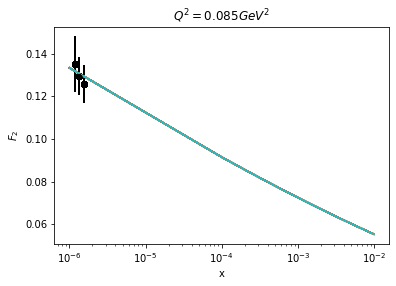

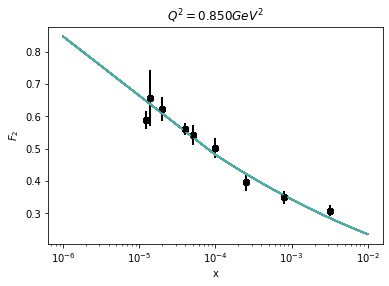

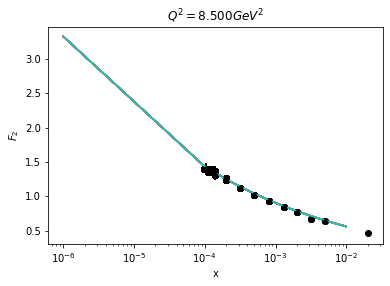

In [5]:
for Q2 in lista_Q2:
    
    # Lists to store F2 of each quark flavor:
    
    lista_F2u = []
    lista_F2d = []
    lista_F2s = []
    lista_F2c = []
    lista_F2b = []
    
    # Lists to store experiment data:
    
    lista_x1 = []
    lista_F21 = []
    lista_err1 = []
    
#-----------------------------------------------------------------------------
#----------------------------LIGHT QUARKS-------------------------------------
#-----------------------------------------------------------------------------
    
#---------------------------------UP------------------------------------------

    # Integration function for transversal sigma (total cross section):    

    def func_sig_T_up(r, z):
        
        Qf = z * (1 - z) * Q2 + m_l ** 2
        rQf = r * sqrt(Qf)
        psi_T = ((2 * Nc * alpha) / (4 * pi ** 2)) * (e_ucb ** 2) * ( (z ** 2 + (1 - z) ** 2) * Qf * kn(1, rQf) ** 2 + m_l ** 2 * kn(0, rQf) ** 2)
      
        sig_dip = sig0 * (1 - exp((-r ** 2 * Q0 ** 2 * (x0 / x) ** (lambda1)) / 4))
        
        func_sig_T =  r * psi_T * sig_dip
        
        return 2 * pi * func_sig_T
    
    # Integration function for longitudinal sigma (total cross section):
    
    def func_sig_L_up(r, z):
        
        Qf = z * (1 - z) * Q2 + m_l ** 2
        rQf = r * sqrt(Qf)
        psi_L = ((2 * Nc * alpha) / (4 * pi ** 2)) * (e_ucb ** 2) * ( 4 * Q2 * z ** 2 * (1 - z) ** 2 * kn(0, rQf) ** 2)
       
        sig_dip = sig0 * (1 - exp((-r ** 2 * Q0 ** 2 * (x0 / x) ** (lambda1)) / 4))
        
        func_sig_L =  r * psi_L * sig_dip
        
        return 2 * pi * func_sig_L
    
    # Integration loop varying x from 10^-6 to 10^-2 with step 10^-5     
    
    for x in np.arange(0.000001, 0.01, 0.0001):
        
        sig_T_up, err_T_up = nquad(func_sig_T_up, [[0, np.inf],[0, 1]])   #nquad(função, [[intervalo de r], [intervalo de z]])
            
        sig_L_up, err_L_up = nquad(func_sig_L_up, [[0, np.inf],[0, 1]])
        
        #F2 = sig_L_up + sig_T_up
        
        F2 = (Q2 / (4 * pi ** 2 * alpha)) * (sig_L_up + sig_T_up)
        
        lista_F2u.append(F2)
        
#---------------------------------DOWN----------------------------------------

    # Integration function for transversal sigma (total cross section):    

    def func_sig_T_down(r, z):
        
        Qf = z * (1 - z) * Q2 + m_l ** 2
        rQf = r * sqrt(Qf)
        psi_T = ((2 * Nc * alpha) / (4 * pi ** 2)) * (e_ds ** 2) * ( (z ** 2 + (1 - z) ** 2) * Qf * kn(1, rQf) ** 2 + m_l ** 2 * kn(0, rQf) ** 2)
      
        sig_dip = sig0 * (1 - exp((-r ** 2 * Q0 ** 2 * (x0 / x) ** (lambda1)) / 4))
        
        func_sig_T =  r * psi_T * sig_dip
        
        return 2 * pi * func_sig_T
    
    # Integration function for longitudinal sigma (total cross section):
    
    def func_sig_L_down(r, z):
        
        Qf = z * (1 - z) * Q2 + m_l ** 2
        rQf = r * sqrt(Qf)
        psi_L = ((2 * Nc * alpha) / (4 * pi ** 2)) * (e_ds ** 2) * ( 4 * Q2 * z ** 2 * (1 - z) ** 2 * kn(0, rQf) ** 2)
       
        sig_dip = sig0 * (1 - exp((-r ** 2 * Q0 ** 2 * (x0 / x) ** (lambda1)) / 4))
        
        func_sig_L =  r * psi_L * sig_dip
        
        return 2 * pi * func_sig_L
    
    # Integration loop varying x from 10^-6 to 10^-2 with step 10^-5  
    
    for x in np.arange(0.000001, 0.01, 0.0001):
        
        sig_T_down, err_T_down = nquad(func_sig_T_down, [[0, np.inf],[0, 1]])   #nquad(função, [[intervalo de r], [intervalo de z]])
            
        sig_L_down, err_L_down = nquad(func_sig_L_down, [[0, np.inf],[0, 1]])
        
        #F2 = sig_L_up + sig_T_up
        
        F2 = (Q2 / (4 * pi ** 2 * alpha)) * (sig_L_down + sig_T_down)
        
        lista_F2d.append(F2)

#-------------------------------STRANGE---------------------------------------

    # Integration function for transversal sigma (total cross section):    

    def func_sig_T_strange(r, z):
        
        Qf = z * (1 - z) * Q2 + m_l ** 2
        rQf = r * sqrt(Qf)
        psi_T = ((2 * Nc * alpha) / (4 * pi ** 2)) * (e_ds ** 2) * ( (z ** 2 + (1 - z) ** 2) * Qf * kn(1, rQf) ** 2 + m_l ** 2 * kn(0, rQf) ** 2)
      
        sig_dip = sig0 * (1 - exp((-r ** 2 * Q0 ** 2 * (x0 / x) ** (lambda1)) / 4))
        
        func_sig_T =  r * psi_T * sig_dip
        
        return 2 * pi * func_sig_T
    
    # Integration function for longitudinal sigma (total cross section):
    
    def func_sig_L_strange(r, z):
        
        Qf = z * (1 - z) * Q2 + m_l ** 2
        rQf = r * sqrt(Qf)
        psi_L = ((2 * Nc * alpha) / (4 * pi ** 2)) * (e_ds ** 2) * ( 4 * Q2 * z ** 2 * (1 - z) ** 2 * kn(0, rQf) ** 2)
       
        sig_dip = sig0 * (1 - exp((-r ** 2 * Q0 ** 2 * (x0 / x) ** (lambda1)) / 4))
        
        func_sig_L =  r * psi_L * sig_dip
        
        return 2 * pi * func_sig_L
    
    # Integration loop varying x from 10^-6 to 10^-2 with step 10^-5
    
    for x in np.arange(0.000001, 0.01, 0.0001):
        
        sig_T_strange, err_T_strange = nquad(func_sig_T_strange, [[0, np.inf],[0, 1]])   #nquad(função, [[intervalo de r], [intervalo de z]])
            
        sig_L_strange, err_L_strange = nquad(func_sig_L_strange, [[0, np.inf],[0, 1]])
        
        #F2 = sig_L_up + sig_T_up
        
        F2 = (Q2 / (4 * pi ** 2 * alpha)) * (sig_L_strange + sig_T_strange)
        
        lista_F2s.append(F2)

#-----------------------------------------------------------------------------
#----------------------------QUARKS: CHARM------------------------------------
#-----------------------------------------------------------------------------

    # Integration function for transversal sigma (total cross section):

    def func_sig_T_charm(r, z):
        
        Qf = z * (1 - z) * Q2 + m_c ** 2
        rQf = r * sqrt(Qf)
        psi_T = ((2 * Nc * alpha) / (4 * pi ** 2)) * (e_ucb ** 2) * ( (z ** 2 + (1 - z) ** 2) * Qf * kn(1, rQf) ** 2 + m_c ** 2 * kn(0, rQf) ** 2)
        
        x_c = x * (1 + (4 * m_c ** 2)/Q2 )
        
        sig_dip = sig0 * (1 - exp((-r ** 2 * Q0 ** 2 * (x0 / x_c) ** (lambda1)) / 4))
        
        func_sig_T =  r * psi_T * sig_dip
        
        return 2 * pi * func_sig_T
    
    # Integration function for longitudinal sigma (total cross section):
    
    def func_sig_L_charm(r, z):
        
        Qf = z * (1 - z) * Q2 + m_c ** 2
        rQf = r * sqrt(Qf)
        psi_L = ((2 * Nc * alpha) / (4 * pi ** 2)) * (e_ucb ** 2) * ( 4 * Q2 * z ** 2 * (1 - z) ** 2 * kn(0, rQf) ** 2)
        
        x_c = x * (1 + (4 * m_c ** 2)/Q2 )
        
        sig_dip = sig0 * (1 - exp((-r ** 2 * Q0 ** 2 * (x0 / x_c) ** (lambda1)) / 4))
        
        func_sig_L =  r * psi_L * sig_dip
        
        return 2 * pi * func_sig_L
    
    # Integration loop varying x from 10^-6 to 10^-2 with step 10^-5
              
    for x in np.arange(0.000001, 0.01, 0.0001):
         
        sig_T_charm, err_T_charm = nquad(func_sig_T_charm, [[0, np.inf],[0, 1]])
            
        sig_L_charm, err_L_charm = nquad(func_sig_L_charm, [[0, np.inf],[0, 1]])
        
        #F2 = sig_L_up + sig_T_up
        
        F2 = (Q2 / (4 * pi ** 2 * alpha)) * (sig_L_charm + sig_T_charm)
        
        lista_F2c.append(F2)
            
#-----------------------------------------------------------------------------
#----------------------------QUARKS: BOTTOM-----------------------------------
#-----------------------------------------------------------------------------

    # Integration function for transversal sigma (total cross section):

    def func_sig_T_bottom(r, z):
        
        Qf = z * (1 - z) * Q2 + m_b ** 2
        rQf = r * sqrt(Qf)
        psi_T = ((2 * Nc * alpha) / (4 * pi ** 2)) * (e_ucb ** 2) * ( (z ** 2 + (1 - z) ** 2) * Qf * kn(1, rQf) ** 2 + m_b ** 2 * kn(0, rQf) ** 2)
        
        x_c = x * (1 + (4 * m_c ** 2)/Q2 )
        
        sig_dip = sig0 * (1 - exp((-r ** 2 * Q0 ** 2 * (x0 / x_c) ** (lambda1)) / 4))
        
        func_sig_T =  r * psi_T * sig_dip
        
        return 2 * pi * func_sig_T
    
    # Integration function for longitudinal sigma (total cross section):
    
    def func_sig_L_bottom(r, z):
        
        Qf = z * (1 - z) * Q2 + m_b ** 2
        rQf = r * sqrt(Qf)
        psi_L = ((2 * Nc * alpha) / (4 * pi ** 2)) * (e_ucb ** 2) * ( 4 * Q2 * z ** 2 * (1 - z) ** 2 * kn(0, rQf) ** 2)
        
        x_c = x * (1 + (4 * m_c ** 2)/Q2 )
        
        sig_dip = sig0 * (1 - exp((-r ** 2 * Q0 ** 2 * (x0 / x_c) ** (lambda1)) / 4))
        
        func_sig_L =  r * psi_L * sig_dip
        
        return 2 * pi * func_sig_L
    
    # Integration loop varying x from 10^-6 to 10^-2 with step 10^-5
      
    for x in np.arange(0.000001, 0.01, 0.0001):
        
        sig_T_bottom, err_T_bottom = nquad(func_sig_T_bottom, [[0, np.inf],[0, 1]])
            
        sig_L_bottom, err_L_bottom = nquad(func_sig_L_bottom, [[0, np.inf],[0, 1]])
        
        #F2 = sig_L_up + sig_T_up
        
        F2 = (Q2 / (4 * pi ** 2 * alpha)) * (sig_L_bottom + sig_T_bottom)
        
        lista_F2b.append(F2)
        
    # Calculating F2 total: F2 = F2l + F2c + F2b
    
    F2_udscb = zip(lista_F2u, lista_F2d, lista_F2s, lista_F2c, lista_F2b)
    
    lista_F2 = [u + d + s + c + b for (u, d, s, c, b) in F2_udscb]

#-----------------------------------------------------------------------------
#----------------------------------GRAPHICS-----------------------------------
#-----------------------------------------------------------------------------

    plt.figure()
    
    for j in range(len(tab)):
        
        if Q2 == tab.iloc[j,0]:
            
        # Experimental data
            
            lista_x1.append(tab.iloc[j,1])
            sig1 = tab.iloc[j,2] * (1/389) # CONVERTS FROM MICROBARN TO GeV^-2
            F21 = (Q2 / (4 * pi ** 2 * alpha)) * sig1
            lista_F21.append(F21)
            #lista_F21.append(sig1)
            err1 = tab.iloc[j,3] * (1/389) # CONVERTS FROM MICROBARN TO GeV^-2
            F2_err1 = (Q2 / (4 * pi ** 2 * alpha)) * err1
            lista_err1.append(F2_err1)
        
        plt.plot(lista_x1, lista_F21, 'o', color='black')
        plt.errorbar(lista_x1, lista_F21, yerr=lista_err1, fmt='.k')
        plt.xscale('log')
        
        # GBW curve - Updated
        
        plt.plot(lista_x_graf, lista_F2)
        plt.xscale('log')
        plt.title('$Q^2 = % .3f GeV^2$' % Q2)
        plt.ylabel('$F_2$')
        plt.xlabel('x')
        #plt.savefig('--- WRITE HERE YOUR PATH ---/Q2_% .3f.png'% Q2, dpi=150, bbox_inches='tight')

    plt.show()